# PROJECT 2 PART EDA

In [24]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook

## 2001

In [25]:
# Load the data from your .csv.gz file into a new DataFrame.
df = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1358 non-null   object 
 1   adult                  1357 non-null   float64
 2   backdrop_path          747 non-null    object 
 3   belongs_to_collection  97 non-null     object 
 4   budget                 1357 non-null   float64
 5   genres                 1357 non-null   object 
 6   homepage               107 non-null    object 
 7   id                     1357 non-null   float64
 8   original_language      1357 non-null   object 
 9   original_title         1357 non-null   object 
 10  overview               1330 non-null   object 
 11  popularity             1357 non-null   float64
 12  poster_path            1227 non-null   object 
 13  production_companies   1357 non-null   object 
 14  production_countries   1357 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.320,1237.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [26]:
filter_budget = df['budget'] >0
filter_budget.sum()

300

In [27]:
filter_revenue = df['revenue'] >0
filter_revenue.sum()

242

In [28]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

194

In [29]:
# Remove any movies with 0's for budget AND revenue from the remaining visualizations.
df = df[filter_financial]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.320,1237.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.684,2595.0,R
10,tt0120737,0.0,/x2RS3uTcsJJ9IfjNPcgDmukoEcQ.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.404,23473.0,PG-13
12,tt0120824,0.0,/gnyGSoVKOIz1BR34lIBuuTq0Znl.jpg,NaN,38000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,6440.0,en,The Shipping News,...,24690441.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never guess what you'll find inside...,The Shipping News,0.0,6.318,341.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,tt0294289,0.0,NaN,NaN,344.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.americanadobo.com,50819.0,tl,American Adobo,...,342855.0,104.0,"[{'english_name': 'Tagalog', 'iso_639_1': 'tl'...",Released,Sex is the appetizer. Love is the main course....,American Adobo,0.0,4.400,7.0,NaN
1053,tt0296042,0.0,/aw0EeseSr10dVUuY6Aiv6HhP8UW.jpg,"{'id': 1175577, 'name': 'Ichi Collection', 'po...",1400010.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9696.0,ja,殺し屋1,...,80631.0,129.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,Love really hurts.,Ichi the Killer,0.0,6.960,864.0,NaN
1166,tt0310790,0.0,/hAvu0oWrEbbPN71QC8w1NIoUYQT.jpg,"{'id': 518467, 'name': 'El Bosque Animado', 'p...",3747230.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,49612.0,gl,O Bosque Animado,...,482902.0,83.0,"[{'english_name': 'Galician', 'iso_639_1': 'gl...",Released,NaN,The Living Forest,0.0,5.400,23.0,PG
1278,tt0445841,0.0,/lO3XAxV38SC7ZuuNVdy6E6nOZac.jpg,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,zh,一個爛賭的傳說,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.800,3.0,NaN


In [30]:
print(f"There are {len(df)} movies with valid budget/revenue.")

There are 194 movies with valid budget/revenue.


How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        80
PG-13    64
NaN      27
PG       16
G         5
NR        2
Name: certification, dtype: int64

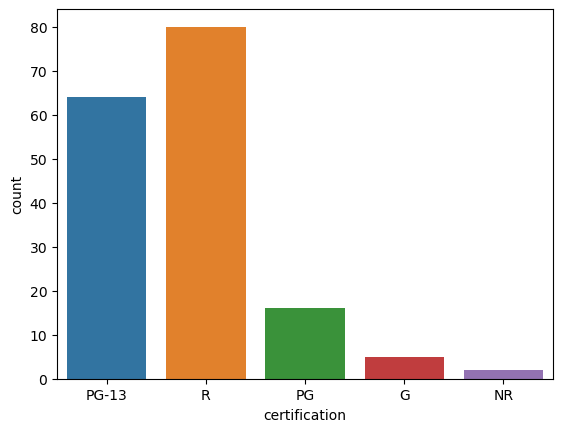

In [31]:
sns.countplot(data=df, x='certification');
df['certification'].value_counts(dropna=False)

What is the average revenue per certification category?

certification
G       $ 177,814,925
NR       $ 26,808,346
PG      $ 156,067,522
PG-13   $ 106,329,120
R        $ 52,374,746
Name: revenue, dtype: float64

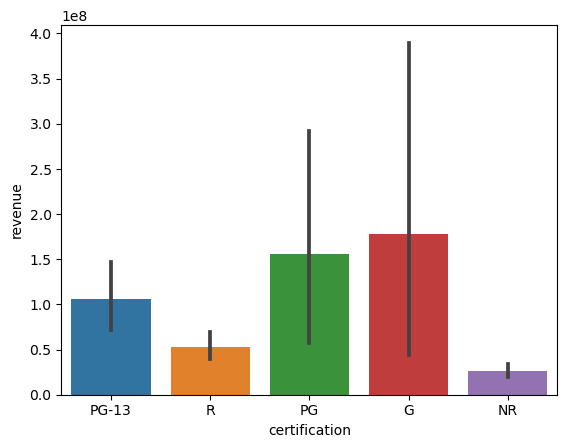

In [32]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['revenue'].mean())

sns.barplot(data=df, x='certification', y='revenue');

## 2002

In [33]:
# Load the data from your .csv.gz file into a new DataFrame.
df = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1295 non-null   object 
 1   adult                  1294 non-null   float64
 2   backdrop_path          775 non-null    object 
 3   belongs_to_collection  120 non-null    object 
 4   budget                 1294 non-null   float64
 5   genres                 1294 non-null   object 
 6   homepage               106 non-null    object 
 7   id                     1294 non-null   float64
 8   original_language      1294 non-null   object 
 9   original_title         1294 non-null   object 
 10  overview               1262 non-null   object 
 11  popularity             1294 non-null   float64
 12  poster_path            1183 non-null   object 
 13  production_companies   1294 non-null   object 
 14  production_countries   1294 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,...,0.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Crime and Punishment,0.0,5.300,12.0,NaN
2,tt0118926,0.0,/qR3Dk3ctnrrxkAI6I472RhamIbu.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,...,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.200,51.0,R
3,tt0119980,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,563364.0,en,Random Shooting in LA,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Random Shooting in LA,0.0,0.000,0.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.424,1911.0,R


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [34]:
filter_budget = df['budget'] >0
filter_budget.sum()

316

In [35]:
filter_revenue = df['revenue'] >0
filter_revenue.sum()

277

In [36]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

215

In [37]:
# Remove any movies with 0's for budget AND revenue from the remaining visualizations.
df = df[filter_financial]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.424,1911.0,R
5,tt0120804,0.0,/l5KvxFVOru3Qyf3dl2asNw5g1MD.jpg,"{'id': 17255, 'name': 'Resident Evil Collectio...",33000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",https://www.sonypictures.com/movies/residentevil,1576.0,en,Resident Evil,...,102984862.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A secret experiment. A deadly virus. A fatal m...,Resident Evil,0.0,6.611,5843.0,R
6,tt0120912,0.0,/o1l6OCqA3pYDZHIc5L1s7CEzCMv.jpg,"{'id': 86055, 'name': 'Men In Black Collection...",140000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.sonypictures.com/movies/meninblackii,608.0,en,Men in Black II,...,445135288.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Back in black.,Men in Black II,0.0,6.359,9293.0,PG-13
7,tt0121765,0.0,/abwxHfymXGAbbH3lo9PDEJEfvtW.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,1894.0,en,Star Wars: Episode II - Attack of the Clones,...,649398328.0,142.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,0.0,6.550,12347.0,PG
8,tt0133240,0.0,/mVuH9hNGnxF9bbhlh1Tr9FuG3Uc.jpg,NaN,140000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,9016.0,en,Treasure Planet,...,109578115.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find your place in the universe.,Treasure Planet,0.0,7.531,3834.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,tt0364385,0.0,/3ZDkl8rsoLe6g4FRV9alNH5sZOt.jpg,"{'id': 1972, 'name': 'Ju-on Collection', 'post...",3500000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,11838.0,ja,呪怨,...,3657876.0,92.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,When a grudge from the dead passes to the livi...,Ju-on: The Grudge,0.0,6.684,708.0,R
1138,tt0365960,0.0,/ahXtNFVHtFxvjphZN8QlHRVsu9W.jpg,NaN,20000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,27090.0,en,Zero Day,...,8466.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,"In high school, you're told you can do anythin...",Zero Day,0.0,7.400,79.0,NaN
1225,tt0757920,0.0,/sOkmFOVcDmH2P4GU9Mvyc4ZBC3D.jpg,NaN,10000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,44078.0,fa,Dokhtar-e shirini-foroosh,...,10000.0,105.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Pastry Girl,0.0,1.000,1.0,NaN
1241,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN


In [38]:
print(f"There are {len(df)} movies with valid budget/revenue.")

There are 215 movies with valid budget/revenue.


How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        79
PG-13    67
NaN      42
PG       18
G         6
NR        3
Name: certification, dtype: int64

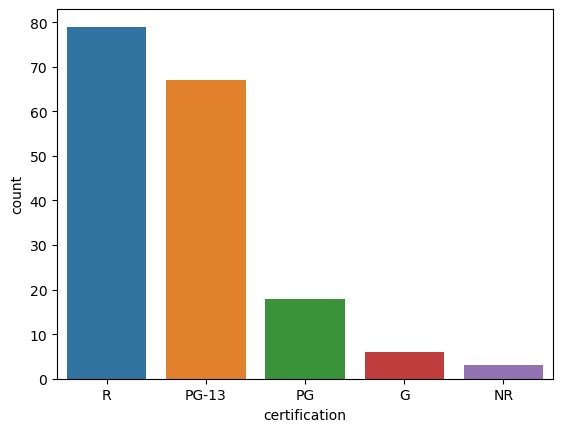

In [39]:
sns.countplot(data=df, x='certification');
df['certification'].value_counts(dropna=False)

What is the average revenue per certification category?

certification
G       $ 108,695,069
NR        $ 2,393,180
PG      $ 220,426,659
PG-13   $ 114,070,214
R        $ 39,965,129
Name: revenue, dtype: float64

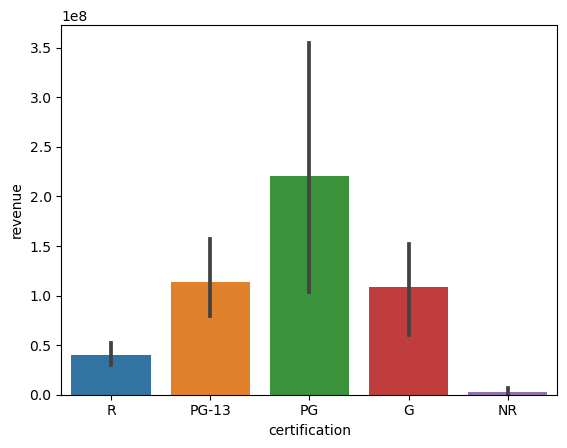

In [40]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['revenue'].mean())

sns.barplot(data=df, x='certification', y='revenue');

What is the average budget per certification category?

certification
G       $ 52,333,333
NR       $ 4,233,333
PG      $ 53,322,222
PG-13   $ 42,681,058
R       $ 26,070,457
Name: budget, dtype: float64

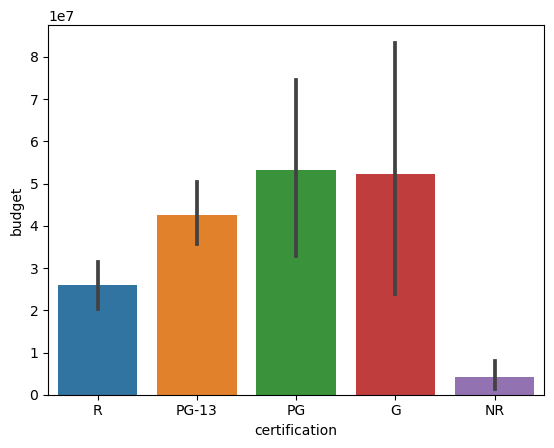

In [41]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['budget'].mean())

sns.barplot(data=df, x='certification', y='budget');